# Pymaceuticals Inc.


### Exploring the Efficacy of Capomulin in Treating Squamous Cell Carcinoma

*Investigate the performance of Capomulin compared to other treatment regimens in addressing squamous cell carcinoma in mice.*

<img src="images/top-pharmaceutical-companies-in-baddi.png" alt="Top Pharmaceutical Companies in Baddi" width="1500" height="500">

**Squamous cell carcinoma of the skin is a type of cancer that starts as a growth of cells on the skin. It starts in cells called squamous cells. The squamous cells make up the middle and outer layers of the skin. Squamous cell carcinoma is a common type of skin cancer.**

**This condition has precursor lesions called actinic keratosis, exhibits `tumor` progression and has the potential to metastasize in the body.**

### Question
> **BACKGROUND** : You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. `The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens`.
The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.

The Assignment is broken down into the following steps.

- Prepare the data.

- Generate summary statistics.

- Create bar charts and pie charts.

- Calculate quartiles, find outliers, and create a box plot.

- Create a line plot and a scatter plot.

- Calculate correlation and regression.

- Submit your final analysis.

## PREPARING THE DATA

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

I will download this file using the `Download the CSV manually` method as the link is provide [`here`](https://static.bc-edx.com/data/dl-1-2/m5/lms/starter/Starter_Code.zip).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


> ##### 1. MERGING DATASETS

We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column.

In [4]:
# Merge the two data frames on 'Mouse ID'
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the merged data frame
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


> ##### 2. Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. Display the data associated with that mouse ID, and then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps.

In [5]:
# Display the number of unique mice IDs

num_unique_mice = merged_df['Mouse ID'].nunique()
print("Number of unique mice IDs: {} ".format(num_unique_mice))

Number of unique mice IDs: 249 


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mice_ID

array(['g989'], dtype=object)

In [7]:
# Get all the data for the duplicate mouse ID. 
dup_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989"]

dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mice_ID)==False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

## GENERATE SUMMARY STATISTICS

In [10]:
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


The describe() method in Pandas is indeed a powerful tool for generating summary statistics, including mean, median, standard deviation, and quartiles. It provides a quick overview of the distribution of numeric data in a DataFrame. However, it does not directly include variance and SEM (Standard Error of the Mean) in its output.

In [11]:
# Group by 'Drug Regimen' and calculate summary statistics

"""In this case, since we are interested in summary statistics for 'Tumor Volume (mm3)' within each drug regimen,
grouping by 'Drug Regimen' alone is sufficient. 
The summary statistics are then calculated for the 'Tumor Volume (mm3)' column within each group."""

summary_stats_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Display the DataFrame of summary statistics
print(summary_stats_df)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Create Bar Charts and Pie Charts

> 1. **Generate two bar charts. Both charts should be identical and show the total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study**. (i) Create the first bar chart with the Pandas DataFrame.plot() method.(ii) Create the second bar chart with Matplotlib's pyplot methods.

In [12]:
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
each_drug_regimen_count = clean_df["Drug Regimen"].value_counts()
each_drug_regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, 'Timepoint')

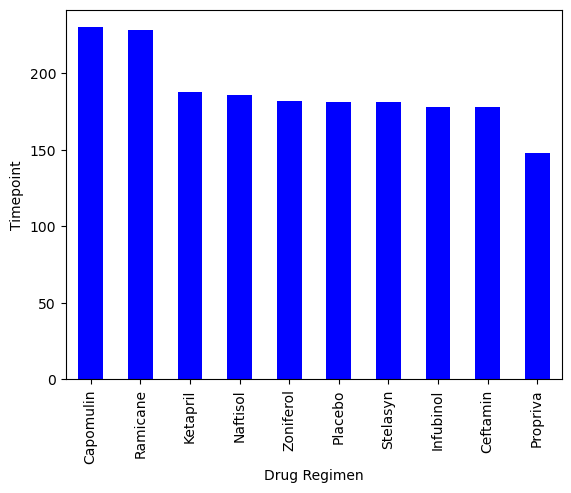

In [13]:
# Create a Pandas bar plot based off of the group series from before and label the title
plot_pandas = each_drug_regimen_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

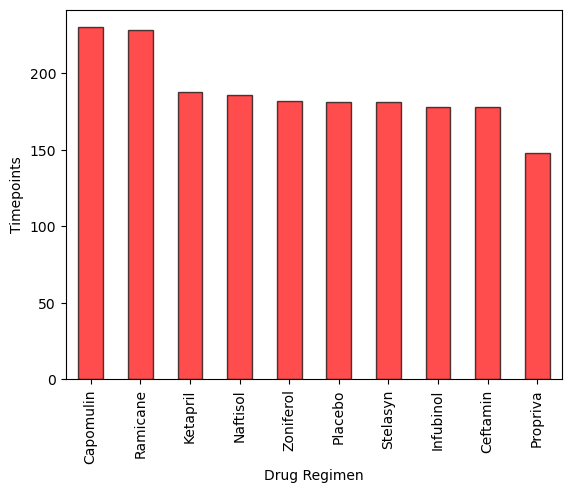

In [14]:


bar_plot = clean_df['Drug Regimen'].value_counts().plot(kind='bar', color='red', alpha=0.7, edgecolor='black')
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Timepoints')
plt.show()

> **1.** *Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.Create the first pie chart with the Pandas DataFrame.plot() method.Create the second pie chart with Matplotlib's pyplot methods.*

In [15]:
# Assuming 'cleaned_df' is your DataFrame

   # get count for the Sex group (male or female)
gender_distribution = clean_df['Sex'].value_counts()

gender_distribution

Sex
Male      958
Female    922
Name: count, dtype: int64

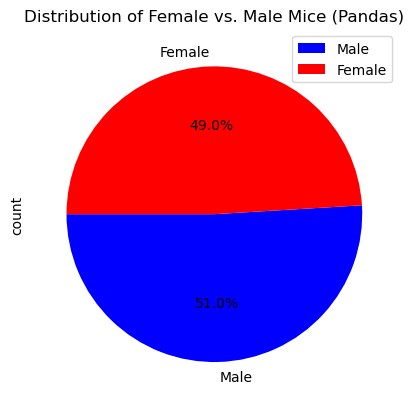

In [16]:
# Plot the pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], startangle=180, legend=True)

# Set title
plt.title('Distribution of Female vs. Male Mice (Pandas)')

# Display the plot
plt.show()


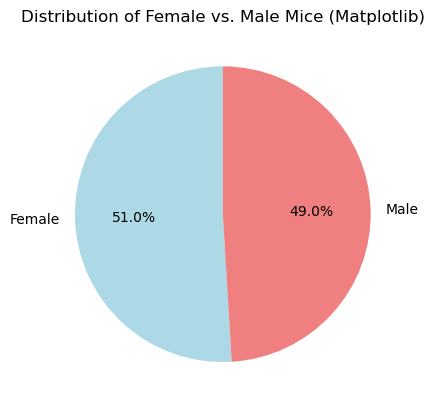

In [17]:
# Assuming 'cleaned_df' is your DataFrame
gender_distribution = clean_df['Sex'].value_counts()

# Create a figure and axis
figure , axis = plt.subplots()

# Plot the pie chart using Matplotlib
axis.pie(gender_distribution, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
                              # labels=gender_distribution.index
# Set title
axis.set_title('Distribution of Female vs. Male Mice (Matplotlib)')

# Display the plot
plt.show()


## Calculate Quartiles, Find Outliers, and Create a Box Plot
> Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: `Capomulin`, `Ramicane`, `Infubinol`, and `Ceftamin`. *Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. Use the following substeps*:

        1.  Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.

        2.  Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data

        3.  Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.

        4.  Determine outliers by using the upper and lower bounds, and then print the results.

        5.  Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:   <<---GOAL


# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of promising treatment regimens
given_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter DataFrame for the promising regimens
given_regimens = clean_df[clean_df['Drug Regimen'].isin(given_regimens)]

given_regimens.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
86,j913,Ramicane,Female,4,17,5,44.014900,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
1048,k483,Infubinol,Female,20,30,20,54.778961,1
1580,u149,Ceftamin,Male,24,29,15,48.522373,0
271,d251,Ramicane,Female,8,19,40,38.265404,2


In [19]:
# Identify the last time point for each mouse
last_timepoint_df = given_regimens.groupby('Mouse ID')['Timepoint'].max().reset_index()

last_timepoint_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [20]:
# Merge the last time point data with the original DataFrame to get the final tumor volume
final_tumor_volume_df = pd.merge(last_timepoint_df, given_regimens, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [21]:
# Display the DataFrame with the final tumor volume for each mouse
final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each drug in the treatments list
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR for each treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Print results
    print(f"\nTreatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Check for outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"Outliers: {outliers}")



Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


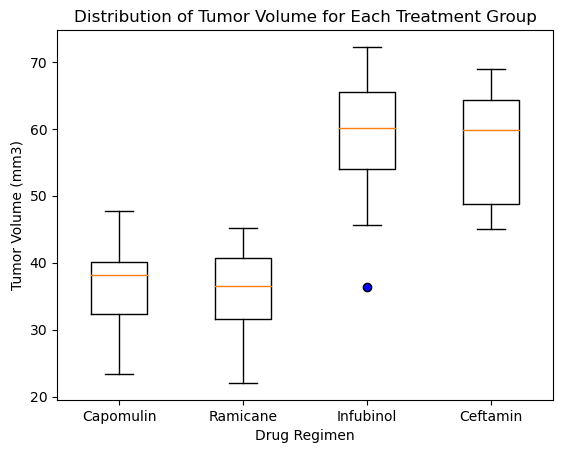

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group


# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='b', marker='o'))

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Create a Line Plot and a Scatter Plot

> Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse. + `Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.`

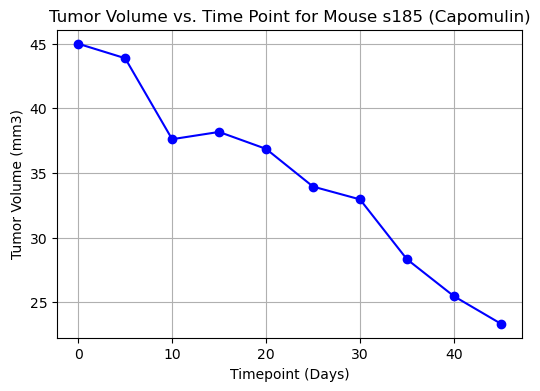

In [24]:

# Select a Mouse Treated with Capomulin
capomulin_mice = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
selected_mouse = capomulin_mice['Mouse ID'].unique()[0]  # Choose the first mouse as an example

# Extract Data for the Selected Mouse
selected_mouse_data = capomulin_mice[capomulin_mice['Mouse ID'] == selected_mouse]

# Generate a Line Plot
plt.figure(figsize=(6, 4))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show() 

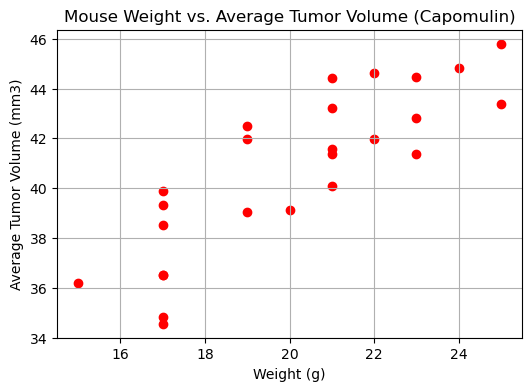

In [25]:
# Calculate Average Tumor Volume for Each Mouse
average_tumor_volume = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract Unique Mouse Weights
mouse_weights = capomulin_mice.groupby('Mouse ID')['Weight (g)'].agg('unique').str[0]

# Generate a Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='r')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Calculate Correlation and Regression
> Calculate the correlation coefficient and linear regression model between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen.
`Plot the linear regression model on top of the previous scatter plot.`

In [26]:
capomulin_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [27]:
mouse_weights.corr(average_tumor_volume)

0.8419363424694722

Correlation Coefficient: 0.841936342469472


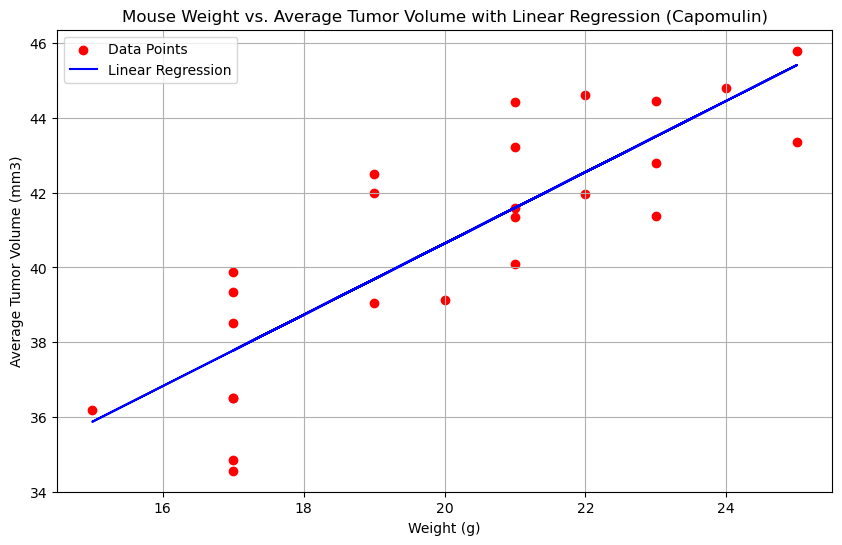

In [28]:
from scipy.stats import pearsonr, linregress

# Step 1: Calculate Correlation Coefficient
correlation_coefficient, _ = pearsonr(mouse_weights, average_tumor_volume)
print(f"Correlation Coefficient: {correlation_coefficient}")

# Step 2: Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Step 3: Plot Scatter Plot with Linear Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='r', label='Data Points')
plt.plot(mouse_weights, slope * mouse_weights + intercept, 'b-', label='Linear Regression')

plt.title("Mouse Weight vs. Average Tumor Volume with Linear Regression (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()
